In [1]:
import numpy as np
import pandas as pd
import gym
import time 
import os
from gym import spaces
import matplotlib.pyplot as plt
from agents import DQN
from env_variable_info import RegEnv
from IPython.display import display, clear_output
import torch
import torch.nn as nn

# Training DQN

In [2]:
lr = 0.1
env = RegEnv(lr=lr)
alpha = 0.001
gamma = 0.99
episodes = 100000
batch_size = 128
epsilon = 0.3
decay = True
disc_factor = 0.35
discount = 1-1/(episodes*disc_factor)


def adaptive(self, episode):
    self.epsilon = max(0.01, min(1.0, self.epsilon*discount))
# Adaptive modifica el epsilon creando un decaimiento exponencial del mismo
# desde 1 hasta un mínimo de 0.01, para ver el decaimiento se puede
# representar: plt.plot(range(episodes),discount**np.array(range(episodes)))
# De manera que si el discount factor es mayor, el decaimiento es más suave.
# De esta manera se incentiva la exploración frente a la explotación
# en los primeros episodios.


if decay is True:
    epsilon = 1
    adaptive = adaptive
else:
    adaptive = None
    disc_factor = 0
# Si especifico decay = False, entonces no se utiliza el decaimiento para
# épsilon, y este parámetro queda fijo con el valor que se ponga arriba.

model = DQN(env, alpha, gamma, epsilon, adaptive=adaptive,
            save=f'./weights_{env.action_space.n}actions_{episodes}_{alpha}_{gamma}_{batch_size}_{decay}_{disc_factor}.pt')

In [6]:
stats = model.train(env, episodes, batch_size=batch_size)

ns: -5652.1572265625
Episode: 99514 Returns: -928.799560546875
Episode: 99515 Returns: -96518.703125
Episode: 99516 Returns: -7050.68408203125
Episode: 99517 Returns: -31446.626953125
Episode: 99518 Returns: -7759.43115234375
Episode: 99519 Returns: -3542.771484375
Episode: 99520 Returns: -2066.69140625
Episode: 99521 Returns: -63250.1640625
Episode: 99522 Returns: -31104.0625
Episode: 99523 Returns: -32095.806640625
Episode: 99524 Returns: -108311.265625
Episode: 99525 Returns: -125578.640625
Episode: 99526 Returns: -199.50636291503906
Episode: 99527 Returns: -353209.28125
Episode: 99528 Returns: -15065.4375
Episode: 99529 Returns: -4908.9912109375
Episode: 99530 Returns: -639.5684814453125
Episode: 99531 Returns: -1297.2349853515625
Episode: 99532 Returns: -3969.2109375
Episode: 99533 Returns: -207237.59375
Episode: 99534 Returns: -1801.1695556640625
Episode: 99535 Returns: -18354.748046875
Episode: 99536 Returns: -462.9220275878906
Episode: 99537 Returns: -189755.453125
Episode: 995

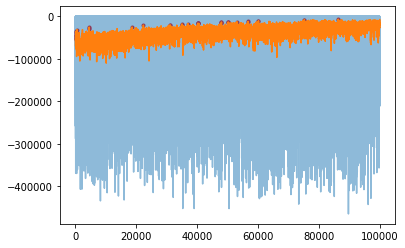

In [7]:
checks = np.array(stats['checkpoints']).astype(int)
rewards = np.array(stats['rewards'])
smooth = pd.DataFrame(rewards).rolling(40).mean()
# Plot de las curvas de entrenamiento.
plt.plot(range(len(rewards)), rewards, alpha=0.5)
plt.plot(range(len(smooth)), smooth)
plt.scatter(checks, smooth.iloc[checks], c='r', marker='.')
plt.show()